In [138]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split

In [139]:
# Define the transformation for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Set the batch size
batch_size = 7

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Split the training set into training and validation sets
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
trainset, valset = random_split(trainset, [train_size, val_size], generator=torch.Generator().manual_seed(42))

# Create data loaders for training, validation, and testing
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


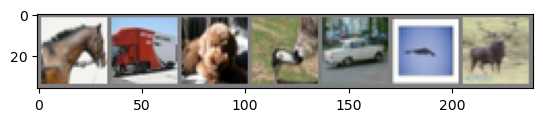

horse truck dog   bird  car   plane deer 


In [140]:
# Define the classes
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [141]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Create an instance of the network
net = Net()


In [142]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
# Lists to store the training loss and errors
train_losses = []
train_errors = []
val_errors = []
test_accuracies = []

# Training loop
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    train_accuracy = correct / total
    train_error = 1 - train_accuracy
    train_errors.append(train_error)

    # Calculate the validation error
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = correct / total
    val_error = 1 - val_accuracy
    val_errors.append(val_error)

    # Calculate the test accuracy
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_accuracies.append(test_accuracy)

    print(f'Epoch: {epoch + 1}, Training Loss: {train_loss:.3f}, Training Error: {train_error:.3f}, Validation Error: {val_error:.3f}, Test Accuracy: {test_accuracy:.3f}')

print('Finished Training')


Epoch: 1, Training Loss: 1.802, Training Error: 0.664, Validation Error: 0.652, Test Accuracy: 0.350


In [ ]:
# Plot the training loss
plt.plot(range(len(train_losses)), train_losses)
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. Epoch')
plt.show()

# Plot the training and validation errors
plt.plot(range(len(train_errors)), train_errors, label='Training Error')
plt.plot(range(len(val_errors)), val_errors, label='Validation Error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training Error vs. Epoch')
plt.legend()
plt.show()

# # Plot the test accuracy
# plt.plot(range(len(test_accuracies)), test_accuracies)
# plt.xlabel('Epoch')
# plt.ylabel('Test Accuracy')
# plt.title('Test Accuracy vs. Epoch')
# plt.show()

In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

In [ ]:
 # prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Create an empty confusion matrix
# conf_matrix = np.zeros((len(classes), len(classes)), dtype=int)

# # Disable gradients and set the network to evaluation mode
# net.eval()
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = net(images)
#         _, predicted = torch.max(outputs, 1)
        
#         # Update the confusion matrix
#         for i in range(len(labels)):
#             conf_matrix[labels[i]][predicted[i]] += 1

# # Plot the confusion matrix
# plt.figure(figsize=(10, 8))
# plt.imshow(conf_matrix)
# plt.title('Confusion Matrix')
# plt.colorbar()
# plt.xticks(np.arange(len(classes)), classes, rotation=90)
# plt.yticks(np.arange(len(classes)), classes)
# plt.xlabel('Predicted')
# plt.ylabel('Actual')

# # Add the count values inside the matrix
# for i in range(len(classes)):
#     for j in range(len(classes)):
#         plt.text(j, i, str(conf_matrix[i][j]), ha='center', va='center', color='black')

# plt.show()